In [96]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Allow imports from parent directory 
# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im/35273613#35273613
#module_path = os.path.abspath(os.path.join(os.pardir))
module_path = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\programs\\'
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path

['',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\python36.zip',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\DLLs',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\agomez\\.ipython',
 'C:\\Users\\agomez\\Dropbox\\Harv

In [3]:
import time
import datetime

import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

import seaborn as sns

import itertools
import collections
import warnings
import IPython.display
import scipy.stats
import networkx as nx
from operator import itemgetter

plt.style.use('seaborn-white')
plt.rc('font', family='serif', serif='Helvetica')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=16, linewidth=0.5)


from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from numpy.random import exponential, negative_binomial, randint, choice, binomial
from random import shuffle

import statsmodels.formula.api as smf

LETTERS = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]


In [97]:
import EComm_0001_complexities 

# Paths
path_fig = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\figures\\'
path_data = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\data\\'
path_outputdata = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\outputdata\\'

# format of figures
figformat = "png"
save2file = False

# -------------------------------------------------------------------------------------

# EXPLORING THE ECI WITH A SIMPLE MATRIX UNIFORMLY FILLED, WITH COMMUNITIES

In [5]:
kcomm = 4
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

In [6]:
Cca, Ppa = EComm_0001_complexities.create_toy_Cca_Ppa(240, 1440, K=kcomm)
Mcp_mat = EComm_0001_complexities.ProductionMatrix(np.array(Cca), np.array(Ppa).T, 1)

nestedMcp_df = pd.DataFrame(Mcp_mat, index=Cca.index.values, columns=Ppa.index.values)


# Getting rid of the rows/columns of pure zeros
nestedMcp_df = nestedMcp_df.loc[:, (nestedMcp_df != 0).any(axis=0)]
nestedMcp_df = nestedMcp_df.loc[(nestedMcp_df != 0).any(axis=1), :]
Mcp_mat = np.array(nestedMcp_df)


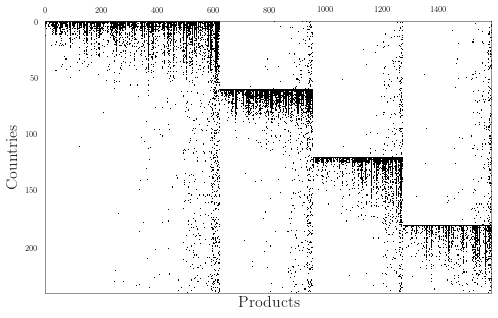

In [7]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(nestedMcp_df)

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(111)
ax1.spy(nestedMcp_df, aspect='auto')
ax1.set_xlabel('Products')
ax1.set_ylabel('Countries')

#ax2 = fig.add_subplot(122)
#ax2.spy(nmat, aspect='auto')
#ax2.set_xlabel('Products')
#ax2.set_ylabel('Countries')

plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0009_nested_Mcp_matrix_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

In [8]:
# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c, Dc, leftVc, rightVc) = EComm_0001_complexities.ECeigenvecs(nestedMcp_df)
minsize = min(nestedMcp_df.shape)
print(minsize)


240


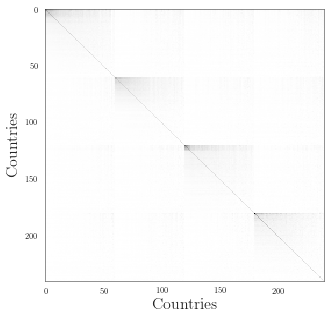

In [9]:
fig = plt.figure(figsize=(5,5))

ax1 = fig.add_subplot(111)
ax1.imshow(Mc2c, aspect='auto', interpolation='nearest')
ax1.set_xlabel('Countries')
ax1.set_ylabel('Countries')

#ax2 = fig.add_subplot(122)
#ax2.spy(nmat, aspect='auto')
#ax2.set_xlabel('Products')
#ax2.set_ylabel('Countries')

plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0009_nested_C_matrix_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

In [10]:
# left-eigenvalue data frame
leftVc_df = pd.DataFrame(leftVc, index=Mc2c.index)
leftVc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

# right-eigenvalue data frame
rightVc_df = pd.DataFrame(rightVc, index=Mc2c.index)
rightVc_df['Community'] = [cname[1] for cname in Mc2c.index.values]


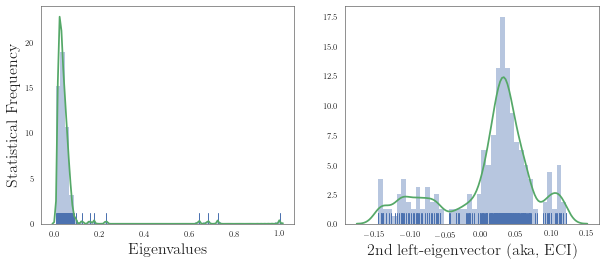

In [11]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
# histogram of country eigenvalues
sns.distplot(Dc.real, bins=50, rug=True, kde=False, norm_hist=True, ax=ax1, axlabel="Eigenvalues")
sns.kdeplot(Dc.real, bw=.005, ax=ax1)
ax1.set_ylabel("Statistical Frequency")

ax2 = fig.add_subplot(1,2,2)
# histogram of country ECI's
sns.distplot(leftVc[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax2, axlabel="2nd left-eigenvector (aka, ECI)")
sns.kdeplot(leftVc[:,1], bw=.01, ax=ax2)
plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0009_nested_Frequencies_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

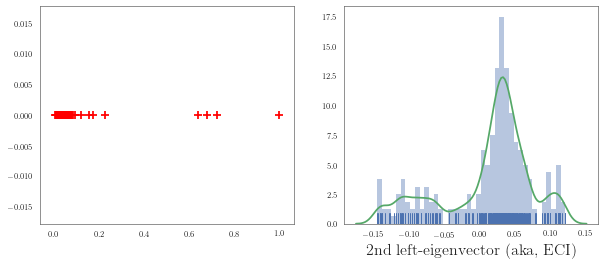

In [12]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
# histogram of country eigenvalues
ax1.scatter(Dc.real, Dc.imag, marker="+", c="red", s=50)
#ax1.kdeplot(Dc, bw=.005, ax=ax1)
#ax1.set_ylabel("Statistical Frequency")

ax2 = fig.add_subplot(1,2,2)
# histogram of country ECI's
sns.distplot(leftVc[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax2, axlabel="2nd left-eigenvector (aka, ECI)")
sns.kdeplot(leftVc[:,1], bw=.01, ax=ax2)
plt.show()

#save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0009_nested_dots_and_Frequencies_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

In [114]:
print("The number of clusters is: {}".format(np.sum(Dc>0.3)))
print(-np.dot(Dc.real, np.log(Dc.real)))

The number of clusters is: 4
28.2013813127


In [14]:
communities_vec = LETTERS[:kcomm]
numcommunities = len(communities_vec)
rncomm = np.arange(numcommunities)
mycolors = sns.color_palette("Set1", n_colors=numcommunities, desat=.5)

(communities_vec, numcommunities, rncomm)


(['A', 'B', 'C', 'D'], 4, array([0, 1, 2, 3]))

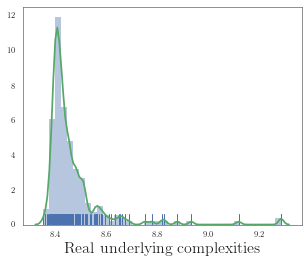

In [18]:
complexitysizes = Cca.sum(axis=1).values

fig = plt.figure(figsize=(5,4))

ax1 = fig.add_subplot(1,1,1)
sns.distplot(np.log(complexitysizes), bins=40, rug=True, kde=False, norm_hist=True, ax=ax1, axlabel="Real underlying complexities")
sns.kdeplot(np.log(complexitysizes), bw=.01, ax=ax1)
plt.show()

In [19]:
cty_marker_sizes = (Cca.sum(axis=1).values/(0.9*np.min(Cca.sum(axis=1).values)))**5
(np.min(cty_marker_sizes), np.max(cty_marker_sizes))

(1.6935087808430291, 182.33683242029727)

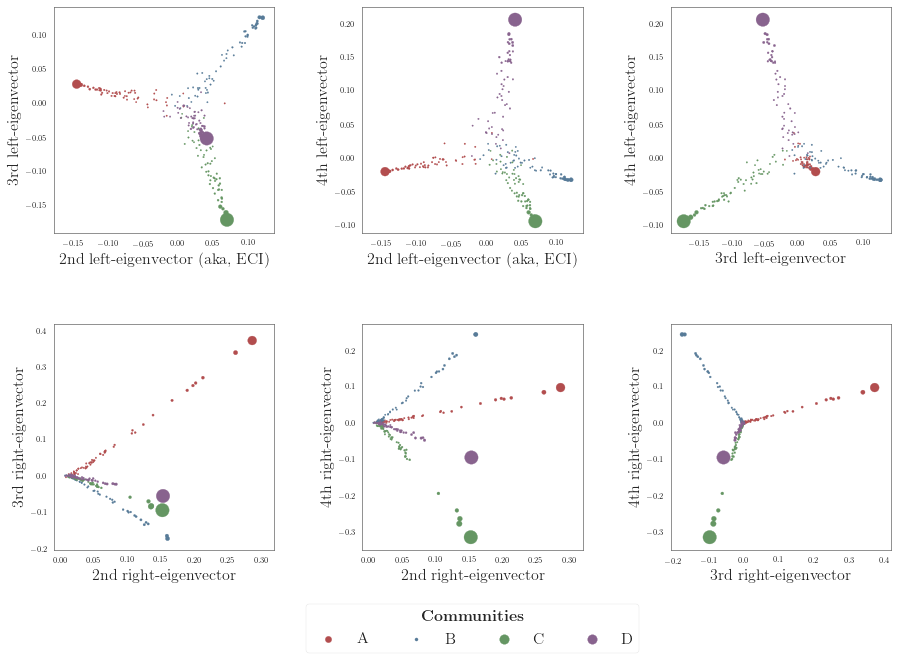

In [20]:
fig = plt.figure(figsize=(15,10))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)


#########################################################################
# FIRST ROW: LEFT-EIGENVECTORS
ax1 = fig.add_subplot(2,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(leftVc_df[leftVc_df.Community==target_name][1], leftVc_df[leftVc_df.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax1.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax1.set_ylabel('3rd left-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(2,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(leftVc_df[leftVc_df.Community==target_name][1], leftVc_df[leftVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax2.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax2.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(2,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(leftVc_df[leftVc_df.Community==target_name][2], leftVc_df[leftVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax3.set_xlabel('3rd left-eigenvector', fontsize=16)
ax3.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))



#########################################################################
# SECOND ROW: RIGHT-EIGENVECTORS
ax4 = fig.add_subplot(2,3,4)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax4.scatter(-rightVc_df[rightVc_df.Community==target_name][1-1], -rightVc_df[rightVc_df.Community==target_name][2-1],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax4.set_xlabel('2nd right-eigenvector', fontsize=16)
ax4.set_ylabel('3rd right-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax5 = fig.add_subplot(2,3,5)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax5.scatter(-rightVc_df[rightVc_df.Community==target_name][1-1], rightVc_df[rightVc_df.Community==target_name][3-1],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax5.set_xlabel('2nd right-eigenvector', fontsize=16)
ax5.set_ylabel('4th right-eigenvector', fontsize=16)

# LEGEND
ax5legend = ax5.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=6,
          title=r'$\bf{Communities}$', fontsize=16, frameon=True, fancybox=True, markerscale=1)
plt.setp(ax5legend.get_title(),fontsize=16)

ax6 = fig.add_subplot(2,3,6)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax6.scatter(-rightVc_df[rightVc_df.Community==target_name][2-1], rightVc_df[rightVc_df.Community==target_name][3-1],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax6.set_xlabel('3rd right-eigenvector', fontsize=16)
ax6.set_ylabel('4th right-eigenvector', fontsize=16)





plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.axis([-2, 3, -3, 3])
plt.show()

save2file=False
if(save2file):
    fig.savefig(path_fig + "EComm_0009_nested_eigenvectors_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

### Principal Component Analysis on the Mcp

In [83]:
pca = PCA(n_components = 5, whiten = True)
X_pca = pca.fit_transform(nestedMcp_df)

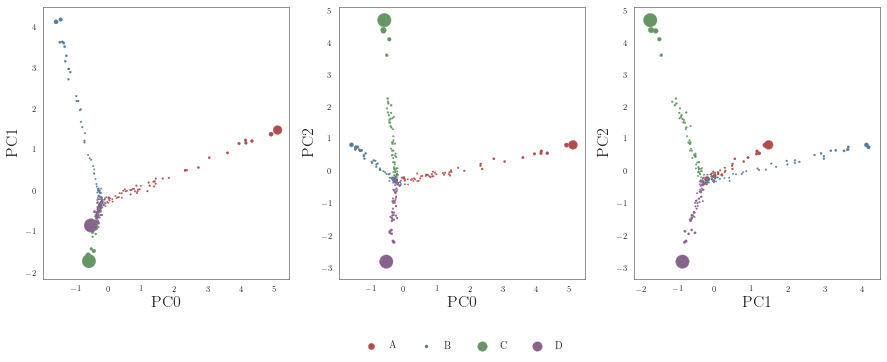

In [84]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(X_pca[leftVc_df.Community==target_name, 0], X_pca[leftVc_df.Community==target_name, 1],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax1.set_xlabel('PC0', fontsize=16)
ax1.set_ylabel('PC1', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(X_pca[leftVc_df.Community==target_name, 0], X_pca[leftVc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax2.set_xlabel('PC0', fontsize=16)
ax2.set_ylabel('PC2', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(X_pca[leftVc_df.Community==target_name, 1], X_pca[leftVc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax3.set_xlabel('PC1', fontsize=16)
ax3.set_ylabel('PC2', fontsize=16)
#plt.legend(loc="center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.05), ncol=5)


#plt.axis([-2, 3, -3, 3])
plt.show()

In [85]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.16935643,  0.29505728,  0.37426254,  0.42007496,  0.44269455])

# Computing distance to the center in PCA space

In [86]:
distvec = np.sqrt(np.diag(np.dot(X_pca, X_pca.T)))

In [87]:
ddf = EComm_0001_complexities.distance_to_center(nestedMcp_df, kcomm=4)

The number of clusters is: 5


In [88]:
ddf.head()

,dist
cA001,6.173872
cA002,5.485788
cA003,4.151642
cA004,3.739090
cA005,3.873688


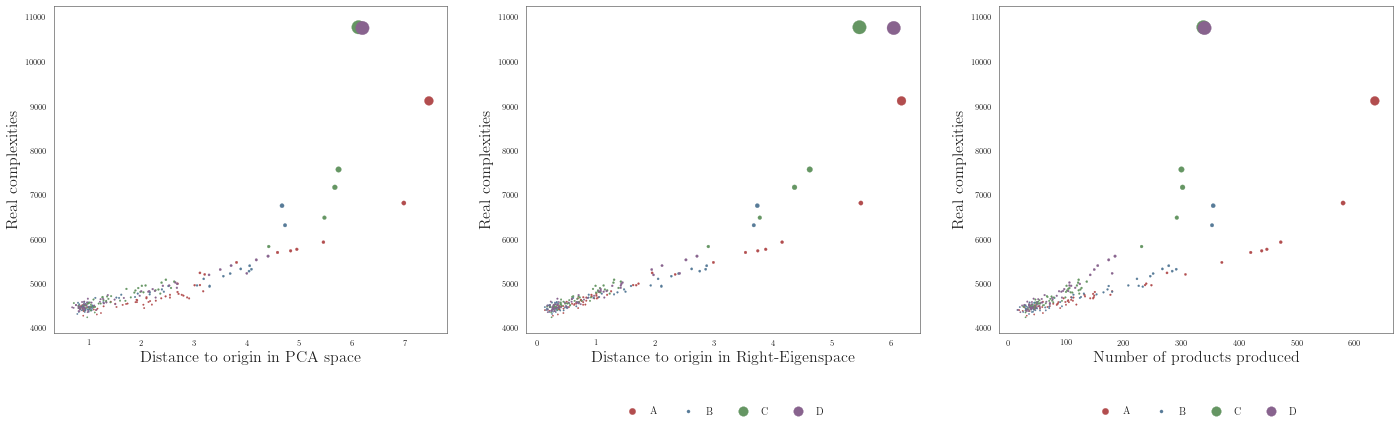

In [89]:
fig = plt.figure(figsize=(24,6))

#########################################################################
# from PCA
ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(distvec[leftVc_df.Community==target_name], complexitysizes[leftVc_df.Community==target_name],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax1.set_xlabel('Distance to origin in PCA space', fontsize=16)
ax1.set_ylabel('Real complexities', fontsize=16)

#########################################################################
# from right eigenspace
ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(ddf[leftVc_df.Community==target_name]["dist"], complexitysizes[leftVc_df.Community==target_name],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax2.set_xlabel('Distance to origin in Right-Eigenspace', fontsize=16)
ax2.set_ylabel('Real complexities', fontsize=16)

plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

#########################################################################
# just using diversity
divprods = nestedMcp_df.sum(axis=1).values
ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(divprods[leftVc_df.Community==target_name], complexitysizes[leftVc_df.Community==target_name],
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax3.set_xlabel('Number of products produced', fontsize=16)
ax3.set_ylabel('Real complexities', fontsize=16)

plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)



plt.show()

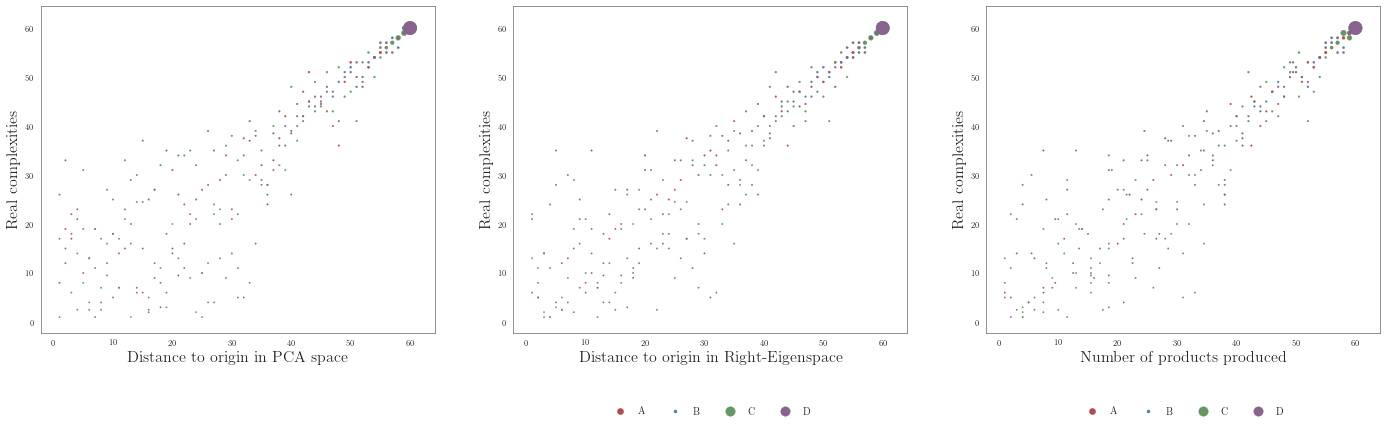

In [90]:
# PLOTTING RANKS
fig = plt.figure(figsize=(24,6))

#########################################################################
# from PCA
ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(scipy.stats.rankdata(distvec[leftVc_df.Community==target_name]), 
                scipy.stats.rankdata(complexitysizes[leftVc_df.Community==target_name]),
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax1.set_xlabel('Distance to origin in PCA space', fontsize=16)
ax1.set_ylabel('Real complexities', fontsize=16)

#########################################################################
# from right eigenspace
ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(scipy.stats.rankdata(ddf[leftVc_df.Community==target_name]["dist"]), 
                scipy.stats.rankdata(complexitysizes[leftVc_df.Community==target_name]),
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax2.set_xlabel('Distance to origin in Right-Eigenspace', fontsize=16)
ax2.set_ylabel('Real complexities', fontsize=16)

plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

#########################################################################
# just using diversity
divprods = nestedMcp_df.sum(axis=1).values
ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(scipy.stats.rankdata(divprods[leftVc_df.Community==target_name]), 
                scipy.stats.rankdata(complexitysizes[leftVc_df.Community==target_name]),
                c=color, label=target_name, 
                s=cty_marker_sizes[leftVc_df.Community==target_name])
ax3.set_xlabel('Number of products produced', fontsize=16)
ax3.set_ylabel('Real complexities', fontsize=16)

plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)



plt.show()

In [94]:
rho, pval = scipy.stats.spearmanr(np.array(np.transpose([distvec, ddf["dist"], divprods, complexitysizes])))
rho

array([[ 1.        ,  0.88397542,  0.88280923,  0.84077966],
       [ 0.88397542,  1.        ,  0.97868288,  0.89867998],
       [ 0.88280923,  0.97868288,  1.        ,  0.87230097],
       [ 0.84077966,  0.89867998,  0.87230097,  1.        ]])

# Computing angle to the most complex

In [95]:
from scipy.spatial import distance

'cA001'

In [108]:
mostcomplexix = ddf.sort_values(by=["dist"], ascending=False).index[0]
mostcomplexix

'cA001'

In [119]:
sims = EComm_0001_complexities.cosine_angle_to_target(nestedMcp_df, mostcomplexix, kcomm=4)

The number of clusters is: 5


In [120]:
sims.head()

,CosSim
cA001,1.000000
cA002,0.999613
cA003,0.994907
cA004,0.989963
cA005,0.992386
